## Recommendation System based on Rating Counts

Dataset url: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the dataset with necessary features

In [2]:
books = pd.read_csv('Datasets/BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

users = pd.read_csv('Datasets/BX-Users.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

ratings = pd.read_csv('Datasets/BX-Book-Ratings.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

In [3]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [4]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [5]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [6]:
# Change the columns name
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users.columns = ['userID', 'Location', 'Age']

ratings.columns = ['userID', 'ISBN', 'bookRating']

In [7]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [8]:
print("Books shape: ", books.shape)
print("Users shape: ", users.shape)
print("Ratings shape: ", ratings.shape)

Books shape:  (271360, 8)
Users shape:  (278858, 3)
Ratings shape:  (1149780, 3)


In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Check the null values for all datasets

In [10]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

In [11]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
users.isna().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [13]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

### Visualization of Rating distribution

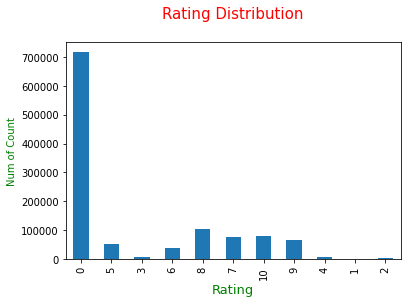

In [15]:
# plt.rc("font", size=15)

ratings.bookRating.value_counts(sort=False).plot(kind='bar')

plt.title("Rating Distribution\n", fontsize=15, color='red')
plt.xlabel("Rating", fontsize=13, color='g')
plt.ylabel("Num of Count", fontsize=10, color='g')
# plt.savefig("RatingDistribution.jpg", bbox_inches='tight')
plt.show()

### Visualization of Age distribution

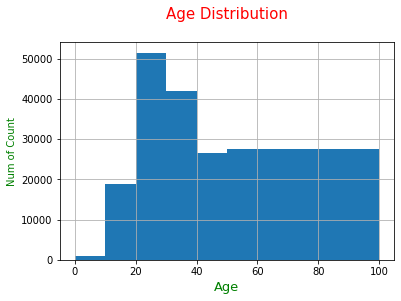

In [16]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title("Age Distribution\n", fontsize=15, color='red')
plt.xlabel("Age", fontsize=13, color='g')
plt.ylabel("Num of Count", fontsize=10, color='g')
plt.show()

#### Add a new column totalBookrating and make a dataframe

In [17]:
rating_count = pd.DataFrame(data=ratings.groupby(by='ISBN')['bookRating'].count())

rating_count.rename(columns={'bookRating':'totalBookRating'}, inplace=True)

rating_count.sort_values(by='totalBookRating', ascending=False).head()

,totalBookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


##### The book with ISBN "0971880107" received the most rating count. Let's find out what book it is and what books are in the top 5

In [18]:
top_5_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns=['ISBN'])

top_5_rated_books

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [19]:
top_5_rated_books_summary = pd.merge(left=top_5_rated_books, right=books, on='ISBN')

top_5_rated_books_summary.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


## Recommendations based on correlations

We use Pearsons'R correlation - coefficient to measure the linear correlation between two variables in our case, the ratings for two books.

First, we need to find out the average rating and the number of ratings each book received

In [20]:
average_rating = pd.DataFrame(ratings.groupby(by='ISBN')['bookRating'].mean())
average_rating['totalRatingCount'] = pd.DataFrame(ratings.groupby(by='ISBN')['bookRating'].count())
average_rating.rename(columns={'bookRating':'averageBookRating'}, inplace=True)
average_rating.sort_values(by="totalRatingCount", ascending=False).head()

,averageBookRating,totalRatingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


##### Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

## To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [21]:
userId_count = ratings['userID'].value_counts()
userId_count

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: userID, Length: 105283, dtype: int64

In [22]:
ratings2 = ratings[ratings['userID'].isin(values=userId_count[userId_count >= 200].index)]

ratings2.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [23]:
ratings2.shape

(527556, 3)

In [24]:
bookRatingCount = ratings2['bookRating'].value_counts()
bookRatingCount

0     393853
8      31574
10     28396
9      23547
7      21124
5      15901
6       9052
4       1784
3       1150
2        633
1        542
Name: bookRating, dtype: int64

In [25]:
ratings3 = ratings2[ratings2['bookRating'].isin(bookRatingCount[bookRatingCount >= 100].index)]
ratings3.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [26]:
ratings3.shape

(527556, 3)

### Rating Matrix

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book

In [27]:
ratings_pivot = ratings3.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Another way to create pivot table

ratings_pivot2 = ratings3.pivot_table(values='bookRating', index='userID', columns='ISBN')
ratings_pivot2.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Extract the specific row based on the ISBN number

books.loc[books['ISBN'] == '0316666343']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...


In [30]:
bones_ratings = ratings_pivot2['0316666343']
bones_ratings

userID
254       NaN
2276      NaN
2766      9.0
2977      NaN
3363      0.0
         ... 
275970    NaN
277427    0.0
277478    NaN
277639    NaN
278418    NaN
Name: 0316666343, Length: 905, dtype: float64

In [31]:
bones_ratings = ratings_pivot2['0316666343']
similar_to_bones = ratings_pivot2.corrwith(other=bones_ratings)
corr_bones = pd.DataFrame(data=similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(other=average_rating['totalRatingCount'])
corr_summary[corr_summary['totalRatingCount'] >= 300].sort_values(by='pearsonR', ascending=False).head(10)

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,totalRatingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [32]:
corr_bones.head()

,pearsonR
ISBN,
0002005018,0.0
0002184974,1.0
0002250810,1.0
000225929X,1.0
0006127754,-1.0


In [33]:
corr_summary.head()

,pearsonR,totalRatingCount
ISBN,,
0002005018,0.0,14
0002184974,1.0,2
0002250810,1.0,3
000225929X,1.0,4
0006127754,-1.0,5


#### We obtained the books 'ISBN'. but we need to find out the titles of the books to see whether they make sense.

In [34]:
books_corr_to_bones = pd.DataFrame(data=['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'],
                                  index=np.arange(9), columns=['ISBN'])
books_corr_to_bones

,ISBN
0,0312291639
1,0316601950
2,0446610038
3,0446672211
4,0385265700
5,0345342968
6,0060930535
7,0375707972
8,0684872153


In [35]:
corr_books_summary = pd.merge(left=books_corr_to_bones, right=books, on='ISBN')
corr_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...


## Collaborative Filtering Using k-Nearest Neighbors (kNN)
kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [37]:
combine_book_rating = pd.merge(left=ratings, right=books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
# Drop those columns that are not important
combine_book_rating.drop(labels=columns, axis='columns', inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [38]:
combine_book_rating.isna().sum()

userID        0
ISBN          0
bookRating    0
bookTitle     0
dtype: int64

In [39]:
combine_book_rating.shape

(1031136, 4)

In [40]:
# We then group by book titles and create a new column for total rating count

combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

combine_book_rating.shape

(1031136, 4)

In [41]:
book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [42]:
# We combine the rating data with the total rating count data, this gives us exactly 
# what we need to find out which books are popular and filter out lesser-known books.

rating_with_totalRatingCount = combine_book_rating.merge(right=book_ratingCount, how='left', left_on='bookTitle', right_on='bookTitle')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [48]:
rating_with_totalRatingCount.shape

(1031136, 5)

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


##### The median book has been rated only once. Let's look at the top of the distribution

In [44]:
print(book_ratingCount['totalRatingCount'].quantile(q=np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalRatingCount, dtype: float64


In [45]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [47]:
rating_popular_book.shape

(288740, 5)

## Filter to users in US and Canada only

In [49]:
combined = rating_popular_book.merge(right=users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]

us_canada_user_rating = us_canada_user_rating.drop(labels='Age', axis=1)

us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


## Cosine Similarity

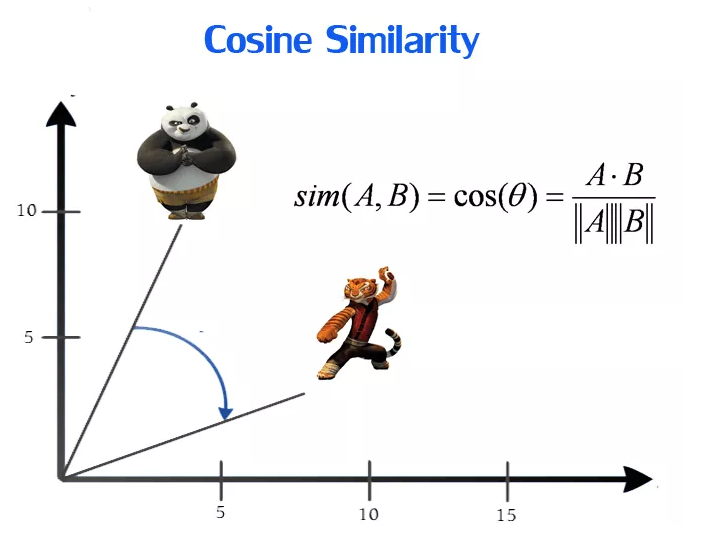

## Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [51]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [52]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(subset=['userID', 'bookTitle'])

us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

In [53]:
us_canada_user_rating_pivot.head()

userID,8,9,14,16,17,23,26,32,39,42,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
bookTitle,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16 Lighthouse Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [54]:
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [55]:
us_canada_user_rating_matrix

<2442x40017 sparse matrix of type '<class 'numpy.float64'>'
	with 97607 stored elements in Compressed Sparse Row format>

In [56]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [58]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

query_index

2135

In [59]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [60]:
distances, indices = model_knn.kneighbors(X=us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [61]:
distances

array([[0.        , 0.63436646, 0.69205791, 0.69989336, 0.7200104 ,
        0.74673623]])

In [62]:
indices

array([[2135, 2327,  463,  342,  687, 1463]], dtype=int64)

In [63]:
us_canada_user_rating_pivot.index[query_index]

'The Secret'

In [65]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for "{0}":\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for "The Secret":

1: Until You, with distance of 0.634366461822877:
2: Dangerous, with distance of 0.6920579081733969:
3: Castles, with distance of 0.699893360802593:
4: For the Roses, with distance of 0.7200103953494539:
5: Saving Grace, with distance of 0.7467362264841236:
